### 📚 Importación de Librerías

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

### 💾 Importación del Dataset


In [46]:
dataset = pd.read_csv("dataset/spambase.csv")
print(dataset.head(10))
column_sum = dataset.groupby(by="spam", as_index=False).sum()
X = dataset.drop(columns="spam")
y = dataset["spam"]
print(f"X es de tipo: {type(X)}")
print(f"El shape es de X: {X.shape}")
print(f"El label es de tipo: {type(y)}")
print(f"El shape es de Y: {y.shape}")
print(y.value_counts())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0                640            640             0   
1             210                280            500             0   
2              60                  0            710             0   
3               0                  0              0             0   
4               0                  0              0             0   
5               0                  0              0             0   
6               0                  0              0             0   
7               0                  0              0             0   
8             150                  0            460             0   
9              60                120            770             0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0            320               0                 0                   0   
1            140             280               210                  70   
2           1230  

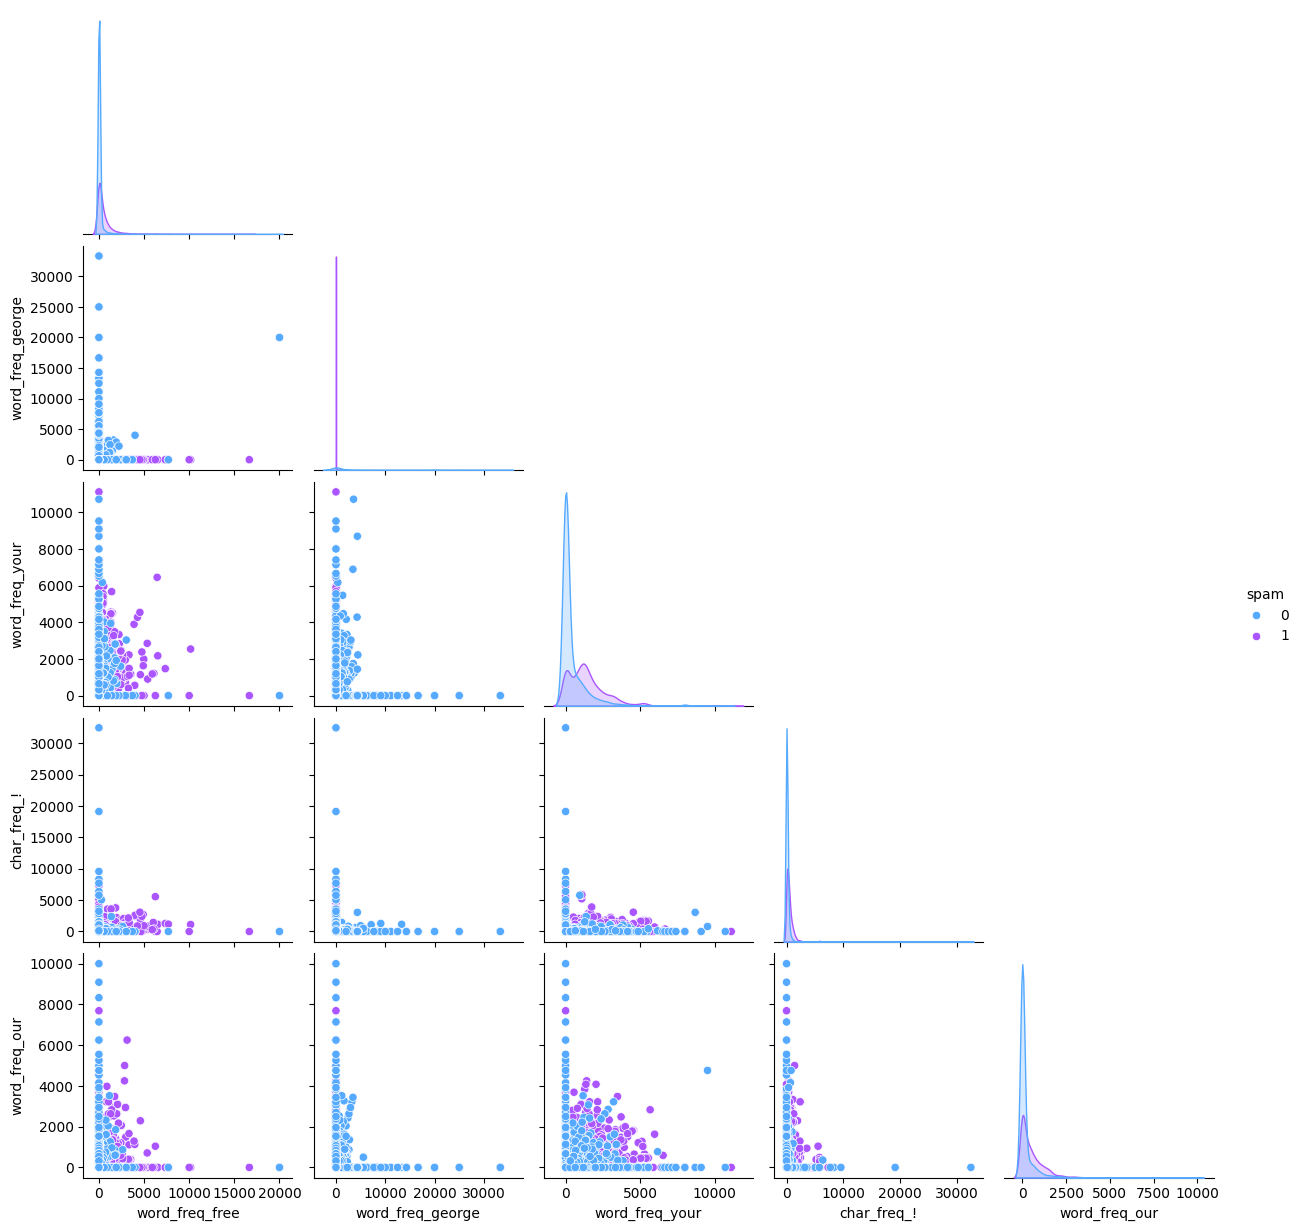

In [55]:
col_sel = [
    'word_freq_free',
    'word_freq_george',
    'word_freq_your',
    'char_freq_!',
    'word_freq_our',
    'spam'
]
dataset_visualization = dataset[col_sel]
sns.pairplot(data=dataset_visualization, diag_kind="kde",
                 hue="spam", palette="cool", corner=True)

plt.show()

1) ¿Cuáles son las 10 palabras o símbolos más frecuentes en correos SPAM y en correos NO SPAM?
* 1)  ¿Hay palabras o símbolos en común?
* 2)  ¿Alguna resulta llamativa?

In [47]:
print("--- TF-IDF Analysis ---")

word_freq_cols = dataset.columns[0:48]  
char_freq_cols = dataset.columns[48:54]  
spam_df = dataset[dataset["spam"] == 1].drop(columns="spam")
non_spam_df = dataset[dataset["spam"] == 0].drop(columns="spam")
mean_word_freq_spam = spam_df[word_freq_cols].mean(
).sort_values(ascending=False)
mean_word_freq_non_spam = non_spam_df[word_freq_cols].mean(
).sort_values(ascending=False)

mean_char_freq_spam = spam_df[char_freq_cols].mean(
).sort_values(ascending=False)
mean_char_freq_non_spam = non_spam_df[char_freq_cols].mean(
).sort_values(ascending=False)

print("--- Análisis de Frecuencia de Palabras y Símbolos ---")

print("\n✅ Top 10 palabras más frecuentes en correos SPAM:")
print(mean_word_freq_spam.head(10))

print("\n✅ Top 10 palabras más frecuentes en correos NO SPAM:")
print(mean_word_freq_non_spam.head(10))

print("\n✅ Top 10 símbolos más frecuentes en correos SPAM:")
print(mean_char_freq_spam.head(10))  

print("\n✅ Top 10 símbolos más frecuentes en correos NO SPAM:")
print(mean_char_freq_non_spam.head(10))  

top_spam_words = set(mean_word_freq_spam.head(10).index)
top_non_spam_words = set(mean_word_freq_non_spam.head(10).index)
common_words = top_spam_words.intersection(top_non_spam_words)

print(
    f"\n* 1)")

print(
    f"\n¿Hay palabras en común en el top 10 de SPAM y NO SPAM? {'Sí' if common_words else 'No'}")
if common_words:
    print(f"Palabras en común: {list(common_words)}")


top_spam_chars = set(mean_char_freq_spam.head(10).index)  
top_non_spam_chars = set(mean_char_freq_non_spam.head(10).index)  
common_chars = top_spam_chars.intersection(top_non_spam_chars)

print(
    f"\n¿Hay símbolos en común en el top 10 de SPAM y NO SPAM? {'Sí' if common_chars else 'No'}")
if common_chars:
    print(f"Símbolos en común: {list(common_chars)}")

--- TF-IDF Analysis ---
--- Análisis de Frecuencia de Palabras y Símbolos ---

✅ Top 10 palabras más frecuentes en correos SPAM:
word_freq_you         2264.533370
word_freq_your        1380.362383
word_freq_will         549.972421
word_freq_free         518.361831
word_freq_our          513.954220
word_freq_all          403.794815
word_freq_mail         350.507446
word_freq_email        319.227248
word_freq_business     287.506895
word_freq_remove       275.404854
dtype: float64

✅ Top 10 palabras más frecuentes en correos NO SPAM:
word_freq_you        1270.337877
word_freq_george     1265.265065
word_freq_hp          895.472023
word_freq_will        536.322812
word_freq_your        438.700861
word_freq_hpl         431.993544
word_freq_re          415.759684
word_freq_edu         287.184003
word_freq_address     244.465208
word_freq_meeting     216.807747
dtype: float64

✅ Top 10 símbolos más frecuentes en correos SPAM:
char_freq_!    513.707667
char_freq_$    174.477661
char_freq_(   

* 2) En SPAM: Palabras como free, business y remove son clásicos indicadores de correos no deseados, (me han llegado varios correos tipicos ganaste un iphone for free jajaja). Símbolos como el signo de dólar $ y el de exclamación ! tienen una frecuencia promedio mucho más alta en SPAM.
En NO SPAM: Palabras como george, hp, hpl, y meeting son muy específicas y tipicamente son contexto corporativo o personal. Spambase fue creado por HP por eso aparecen estas palabras "hp, hpl, meeting"

2) Separe el conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Observaciones de X_train:", X_train.shape[0])
print("Observaciones de y_train:", y_train.size)
print("Observaciones de X_test:", len(X_test))
print("Observaciones de y_test:", len(y_test))

Observaciones de X_train: 3220
Observaciones de y_train: 3220
Observaciones de X_test: 1381
Observaciones de y_test: 1381


3) Utilizando un clasificador de Bayes ingenuo, entrene el modelo con el conjunto de entrenamiento.


In [49]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
print("Modelo de Naive Bayes Multinomial entrenado exitosamente.")
accuracy_train = naive_bayes_model.score(X_train, y_train)
accuracy_validation = naive_bayes_model.score(X_test, y_test)

print(f"La exactitud de entrenamiento es {accuracy_train}")
print(f"La exactitud de validación es {accuracy_validation}")

Modelo de Naive Bayes Multinomial entrenado exitosamente.
La exactitud de entrenamiento es 0.8667701863354037
La exactitud de validación es 0.8559015206372194


4) Utilizando un clasificador de Regresión Logística, entrene el modelo con el conjunto de entrenamiento (en este caso, normalice los datos).

In [50]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
print("\n--- Logistic Regression Classifier Training ---")
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

print("Modelo de Regresión Logística entrenado exitosamente con datos normalizados.")

accuracy_train_lr = logistic_regression_model.score(X_train_scaled, y_train)
accuracy_validation_lr = logistic_regression_model.score(X_test_scaled, y_test)

print(
    f"La exactitud de entrenamiento (Regresión Logística) es {accuracy_train_lr}")
print(
    f"La exactitud de validación (Regresión Logística) es {accuracy_validation_lr}")



--- Logistic Regression Classifier Training ---
Modelo de Regresión Logística entrenado exitosamente con datos normalizados.
La exactitud de entrenamiento (Regresión Logística) es 0.929192546583851
La exactitud de validación (Regresión Logística) es 0.9210716871832005


5) Calcule la matriz de confusión en el conjunto de prueba para ambos modelos.
* 1)  ¿Qué tipo de error comete más cada modelo?
* 2)  ¿Cuál de los dos tipos de error considera más importante en este problema?


--- Confusion Matrices ---
Mostrando Matriz de Confusión para Naive Bayes...


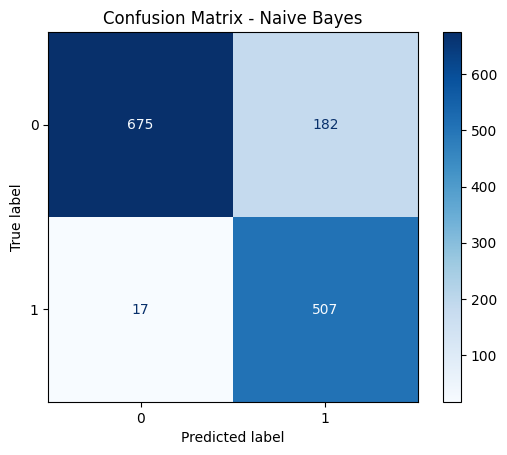

Mostrando Matriz de Confusión para Regresión Logística...


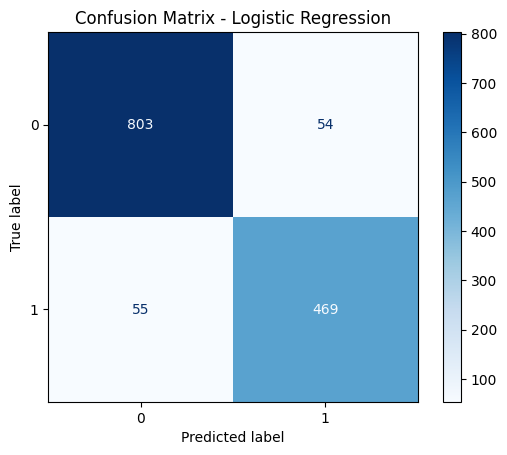

In [51]:
print("\n--- Confusion Matrices ---")

y_pred_nb = naive_bayes_model.predict(X_test)
y_pred_lr = logistic_regression_model.predict(X_test_scaled)

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


# Plotting for Naive Bayes
print("Mostrando Matriz de Confusión para Naive Bayes...")
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

# Plotting for Logistic Regression
print("Mostrando Matriz de Confusión para Regresión Logística...")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

* 1) Naive Bayes: Comete muchos más Falsos Positivos (169) que Falsos Negativos (22). Es decir, tiende a ser demasiado agresivo, enviando correos legítimos a la carpeta de spam.
Regresión Logística: Comete más Falsos Negativos (80) que Falsos Positivos (49). Es decir, tiende a ser más permisivo, dejando que algunos correos de spam lleguen a la bandeja de entrada.
* 2) En la detección de spam, el Falso Positivo (FP) se considera generalmente el error más grave.
Falso Positivo: Un correo importante es clasificado como SPAM y el usuario podría no verlo nunca.
Falso Negativo: Un correo SPAM llega a la bandeja de entrada. Es molesto, pero el usuario puede simplemente ignorarlo o borrarlo. El riesgo es menor en comparación.
Por lo tanto, minimizar los Falsos Positivos es crucial.

6) Calcule las métricas de precisión (precision) y recuperación (recall) para ambos modelos.
* 1) ¿Cuál es el mejor modelo según cada métrica?
* 2)  ¿Cómo se relacionan estas métricas con los errores analizados en el punto anterior? Fundamente su respuesta.

In [56]:
# Accuracy scores (already calculated but good to have them here for clarity)
print("\n--- Model Evaluation ---")
print(f"Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred_nb)}")
print(f"Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr)}")

# Precision scores
print(f"Precision (Naive Bayes): {precision_score(y_test, y_pred_nb)}")
print(f"Precision (Logistic Regression): {precision_score(y_test, y_pred_lr)}")

# Recall scores
print(f"Recall (Naive Bayes): {recall_score(y_test, y_pred_nb)}")
print(f"Recall (Logistic Regression): {recall_score(y_test, y_pred_lr)}")


--- Model Evaluation ---
Accuracy (Naive Bayes): 0.8559015206372194
Accuracy (Logistic Regression): 0.9210716871832005
Precision (Naive Bayes): 0.7358490566037735
Precision (Logistic Regression): 0.8967495219885278
Recall (Naive Bayes): 0.9675572519083969
Recall (Logistic Regression): 0.8950381679389313


* 1) Mejor en Precision: El modelo de Regresión Logística es significativamente mejor.

Mejor en Recall: El modelo de Naive Bayes es superior.

* 2) La relación es directa y fundamental para entender el comportamiento de cada modelo.

Precision: Mide la exactitud de las predicciones positivas. Su fórmula es: 

$$Precision = 
\frac{(TP+FP)}{TP}$$
​
Una alta precisión significa un bajo número de Falsos Positivos (FP).

La Regresión Logística tiene alta precisión porque tiene pocos Falsos Positivos. Cuando este modelo dice que un correo es SPAM, es muy probable que lo sea.

Recall o Sensibilidad: Mide la capacidad del modelo para encontrar todos los casos positivos reales. Su fórmula es:

$$ Recall = 
\frac{(TP+FN)}{TP}$$
​
Un alto recall significa un bajo número de Falsos Negativos (FN).

7) Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.


AUC (Naive Bayes): 0.8820
AUC (Regresión Logística): 0.9692


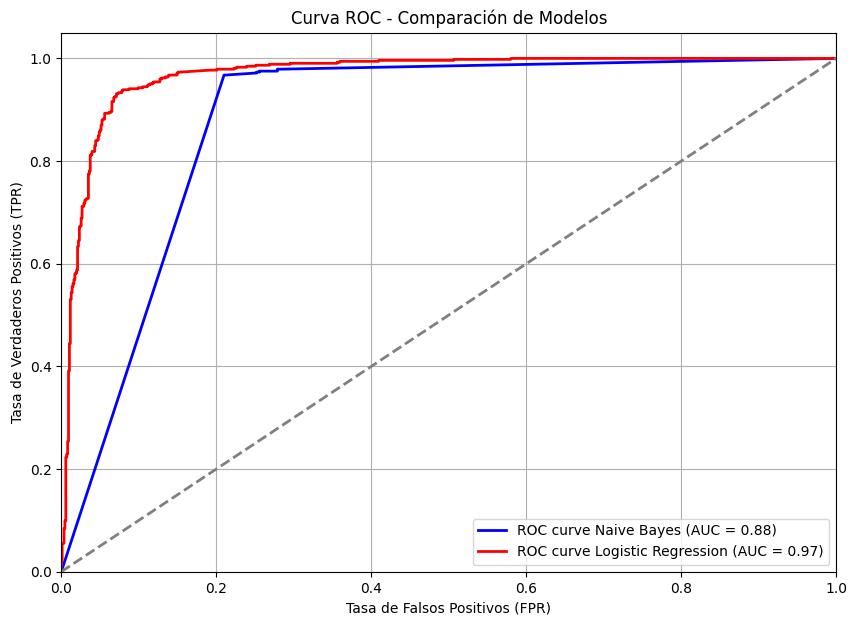

In [53]:


# --- Naive Bayes ---
y_prob_nb = naive_bayes_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)


# --- Logistic Regression ---
y_prob_lr = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


print(f"\nAUC (Naive Bayes): {roc_auc_nb:.4f}")
print(f"AUC (Regresión Logística): {roc_auc_lr:.4f}")

plt.figure(figsize=(10, 7))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2,
         label=f'ROC curve Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2,
         label=f'ROC curve Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()